In [63]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [64]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins = list(reader_ins)

In [65]:
#read in TikTok data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt = list(reader_tt)

In [66]:
#read in YouTube data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt = list(reader_yt)

In [67]:
# Making the Instagram dataframe
dfins = pd.DataFrame(rows_ins)
# Making the first row the header
new_header = dfins.iloc[0] 
dfins = dfins[1:]
dfins.columns = new_header 
dfins

,Unnamed: 0,username,caption,caption_hashtags,tagged_users,subscriber_count,ct_score,counts_disabled,likes,likes_expected,...,date,type,language,post_url,ct_id,country,size,followers_collection_time,dt_year_mon,language_detect
1,80541,nikkietutorials,Loving my new H&M skull leggings <3,[],[],0,-338.9727626459144,False,1529,520483,...,2012-12-30 18:25:41,photo,en,https://www.instagram.com/p/T3uOkkFvBL/,419624|357958006871617611,,,,2012/12,Language.ENGLISH
2,80542,nikkietutorials,My look for a birthday party I'm attending ton...,['LookOfTheDay'],[],0,-159.3099664736361,False,3204,520483,...,2012-12-30 17:59:44,photo,en,https://www.instagram.com/p/T3rQeOlvOO/,419624|357944943367877518,,,,2012/12,Language.ENGLISH
3,80543,nikkietutorials,Eye of the Day: Graphic Eyeliner! #makeuptalk,['makeuptalk'],[],0,-204.0187353629977,False,2524,520483,...,2012-12-29 23:17:09,photo,en,https://www.instagram.com/p/T1qycYlvKm/,419624|357379929850442406,,,,2012/12,Language.ENGLISH
4,80544,nikkietutorials,Sushi lunch date with my dearest @jcxmakeupart...,[],['jcxmakeupartist'],0,-342.7514754098361,False,1509,520483,...,2012-12-29 12:28:54,photo,en,https://www.instagram.com/p/T0gmiJFvCM/,419624|357053655957303436,,,,2012/12,Language.ENGLISH
5,80545,nikkietutorials,My prop for a tutorial I'm filming tomorrow! #...,"['preview', 'sneakpeek']",[],0,-542.7788161993769,False,949,520483,...,2012-12-27 23:05:34,photo,en,https://www.instagram.com/p/Twf35MlvL6/,419624|355924550989837050,,,,2012/12,Language.ENGLISH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122978,13069,beautygloss,Broccoli met garnalen,[],[],0,-83.27948717948718,False,382,32240,...,2012-04-07 18:02:50,photo,nl,https://www.instagram.com/p/JILXlujt1e/,528261|164431385968172382,,,,2012/04,Language.DUTCH
122979,13070,beautygloss,Verse muntthee.. Lekker na een workout :),[],[],0,-69.54817987152035,False,459,32240,...,2012-04-07 10:46:40,photo,nl,https://www.instagram.com/p/JHZc_ujt2K/,528261|164211855157288330,,,,2012/04,Language.DUTCH
122980,13071,beautygloss,Salade gamba.. Mmm!,[],[],0,-65.88032454361054,False,479,32240,...,2012-04-07 10:26:48,photo,nl,https://www.instagram.com/p/JHXLeFDt1f/,528261|164201854703426911,,,,2012/04,Language.DUTCH
122981,13072,beautygloss,Love mijn Hot Diamonds peertje! Mijn nieuwe ev...,[],[],0,-35.96788482834994,False,873,32240,...,2012-04-07 08:05:45,photo,nl,https://www.instagram.com/p/JHHCdVjtzB/,528261|164130866687040705,,,,2012/04,Language.DUTCH


In [68]:
# Making the TikTok dataframe
dftt = pd.DataFrame(rows_tt)
# Making the first row the header
new_header = dftt.iloc[0] 
dftt = dftt[1:]
dftt.columns = new_header 
dftt

,Unnamed: 0.1,Unnamed: 0,username,id,video_description,create_time,region_code,share_count,view_count,like_count,comment_count,music_id,hashtag_names,effect_ids,playlist_id,language_detect
1,0,0,addoveldhuizen,6811889223365430272,#foryou #foryoupage #fyp #tiktot #tiktotnl #ru...,2020-04-04 16:09:14,NL,289.0,287153.0,17074.0,101.0,6.811881334529691e+18,"['russia', 'foryou', 'fyp', 'tiktot', 'foryoup...",,,Language.ENGLISH
2,1,1,addoveldhuizen,6811487581214100480,#foryou #foryoupage #fyp #tiktokforyou #tiktok...,2020-04-03 14:10:45,NL,134.0,482253.0,8583.0,126.0,6.783671027810455e+18,"['foryou', 'fyp', 'foryoupage', 'tiktokforyou'...","['269391', '0']",,Language.ENGLISH
3,2,2,addoveldhuizen,6822215629127306240,Wie heeft er ook een hond?🐕 #honden #uitgaan #...,2020-05-02 12:00:57,NL,227.0,256247.0,25302.0,165.0,6.822215590166482e+18,"['honden', 'woef', 'uitgaan']",['0'],,Language.DUTCH
4,3,3,addoveldhuizen,6821408834825899008,#sushi #eating #japan #foryou #foryoupage,2020-04-30 07:50:16,NL,507.0,115427.0,9411.0,223.0,6.679335648706547e+18,"['eating', 'japan', 'sushi', 'foryou', 'foryou...",['0'],,Language.ENGLISH
5,4,4,addoveldhuizen,6821105591361047552,Ziekenhuis verschillende talen! 🏥#ziekenhuis #...,2020-04-29 12:13:26,NL,141.0,39222.0,3299.0,36.0,6.821105538114424e+18,"['foryou', 'talen', 'ziekenhuis', 'krankenhaus...",['0'],,Language.DUTCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51822,138143,138143,zoetezusjes_official,7179253622855732224,Wij gingen onze eigen squishies maken met doct...,2022-12-20 15:30:46,NL,2.0,3266.0,140.0,0.0,7.179253625523391e+18,"['fyp', 'zoetezusjes']",['0'],,Language.DUTCH
51823,138144,138144,zoetezusjes_official,7179173848657447936,Wij gingen kijken wie Janna het beste kent! He...,2022-12-20 10:21:13,NL,1.0,4064.0,144.0,3.0,7.179173839862697e+18,"['fyp', 'zoetezusjes']",['0'],,Language.DUTCH
51824,138145,138145,zoetezusjes_official,7195707723042868224,"Wij bouwden een kermis in ons eigen huis, het ...",2023-02-02 23:41:04,NL,5.0,15075.0,224.0,18.0,7.195707725488836e+18,"['fyp', 'zoetezusjes']",,,Language.DUTCH
51825,138146,138146,zoetezusjes_official,7192139431254428672,Wij deden de Kies Niet De Verkeerde Cadeau Cha...,2023-01-24 08:54:22,NL,2.0,10171.0,188.0,6.0,7.192139408802745e+18,"['fyp', 'zoetezusjes']",,,Language.DUTCH


In [69]:
# Making the YouTube dataframe
dfyt = pd.DataFrame(rows_yt)
# Making the first row the header
new_header = dfyt.iloc[0] 
dfyt = dfyt[1:]
dfyt.columns = new_header 
dfyt

,Unnamed: 0,video_id,title,description_video,tags,category_id,published_at_video,duration,made_for_kids_video,channel_title,...,absolute_position_1st_disclosure,relative_position_1st_disclosure,Green_disclosure,Yellow_disclosure,Affliated_marketing,Affliated_marketing_pairs,Giveaway,Giveaway_pairs,Green_disclosure_absolute,Green_disclosure_relative
1,528,igrnw-twOkU,BIZARRE TNT TROLL In MINECRAFT!,#shorts \nBIZARRE TNT TROLL In MINECRAFT!,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-07-05T15:00:34Z,PT19S,False,GIEL,...,,,,,,,,,0.0,0.0
2,533,0EH_MRgY1Dc,HOPPER TROLL GAAT TE VER! (Minecraft),HOPPER TROLL GAAT TE VER! (Minecraft)\n#shorts,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-07-02T15:00:00Z,PT16S,False,GIEL,...,,,,,,,,,0.0,0.0
3,539,8M76_mkUve0,Minecraft MAAR GRAS is OP!,#shorts \nMinecraft MAAR GRAS is OP!,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-06-28T15:00:04Z,PT31S,False,GIEL,...,,,,,,,,,0.0,0.0
4,1987,6vyMbfjmqHM,IK HEB EEN DUBBELGANGER?!,●Vorige video: https://www.youtube.com/watch?v...,"dubbelganger,praat video,praten,playbuzz,look ...",24,2017-01-19T17:00:05Z,PT4M3S,False,Don,...,,,,,,,,,0.0,0.0
5,25,tYLrQ9UC7tA,First date! Expectations vs Reality 🫣,,,1,2022-10-06T13:52:42Z,PT18S,False,Jade Konal,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,1049,sLSjXGGpH0k,Posture Analysis (updated version in description),Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-21T17:53:44Z,PT3M55S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0
46668,1050,cOKyq7WPwx4,Anatomy: Planes & Axes (NEW VERSION IN DESCRIP...,Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-11T20:42:54Z,PT5M25S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0
46669,1051,UkMx9QmtcKw,Patient History & RPS-Form,Enroll in our online course: http://bit.ly/PTM...,"patient,history,taking,rps,form,assessment,phy...",27,2013-09-10T20:39:06Z,PT4M19S,False,Physiotutors,...,,,,,,,,,0.0,0.0
46670,7,hTgTEpAY2II,Personal growth🦋 #tattoo,,,24,2023-03-10T17:38:51Z,PT21S,False,Melanie Latooy,...,,,,,,,,,,


In [92]:
# Listing all the username for the Instagram Dataset
insinf = set([username.replace(" ", "").upper() for username in dfins['username'].unique()])
ttinf = set([username.replace(" ", "").upper() for username in dftt['username'].unique()])
ytinf = set([channel_title.replace(" ", "").upper() for channel_title in dfyt['channel_title'].unique()])

                 Name  Count
0              RONALD      2
1     PROJECTJAMESIFY      2
2           FATTYKUDS      3
3     NIKKIETUTORIALS      3
4    LORENZODINATELLE      3
..                ...    ...
96          JORRAPTOR      3
97          MILANKNOL      2
98      STEFANDEVRIES      2
99         KWEBBELKOP      2
100       ESMEEJOANNA      3

[101 rows x 2 columns]


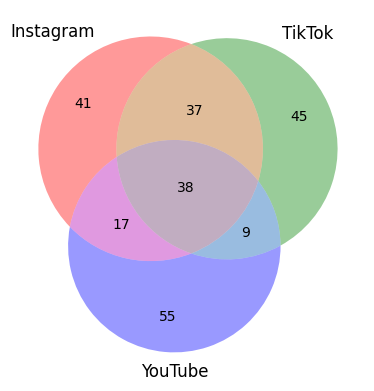

In [91]:
# Find common elements between lists
common_in_1_and_2 = insinf.intersection(ttinf)
common_in_1_and_3 = insinf.intersection(ytinf)
common_in_2_and_3 = ttinf.intersection(ytinf)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf:
        count += 1
    if name in ttinf:
        count += 1
    if name in ytinf:
        count += 1
    name_presence_count[name] = count
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])
print(dfrep)
venn3([insinf, ttinf, ytinf], ('Instagram', 'TikTok', 'YouTube'))
plt.show()